<a href="https://colab.research.google.com/github/Gregory-lab-eng/python_Vistula/blob/main/Strakhov_75209_YOLOv8_training_Vistula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import torch

# ustawienie dostepnej jednostki obliczeniowej
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO("yolov8x.pt").to(device)
dict_classes = model.model.names

# Zauwazcie, jakie sa domyslne klasy, czyli obiekty, ktore model bedzie "probowal" znalezc na obrazku
print (dict_classes)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [7]:
# Rozpakowanie zipa z danymi treningowymi
import zipfile

with zipfile.ZipFile('/content/DeepPCB.v5i.yolov8.zip') as target_file:
    target_file.extractall('/content/data/DeepPBC/')

In [8]:
import yaml

# Ustawienie poszczegolnych katalogow jako train, test i validate oraz okreslenie klas, ktore beda wykorzystane w treningu
data = {'train' :  '/content/data/DeepPBC/train/images',
        'val' :  '/content/data/DeepPBC/valid/images',
        'test' :  '/content/data/DeepPBC/test/images',
        'nc': 6,
        'names': ['copper', 'mousebite', 'open', 'pin-hole', 'short', 'spur']
        }

# Nadpisanie pliku konfiguratora traningu yaml
with open('/content/data/DeepPBC/pbc_data.yaml', 'w') as f:
    yaml.dump(data, f)

# Czytanie zawartosci pliku yaml
with open('/content/data/DeepPBC/pbc_data.yaml', 'r') as f:
    hamster_yaml = yaml.safe_load(f)
    display(hamster_yaml)

{'names': ['copper', 'mousebite', 'open', 'pin-hole', 'short', 'spur'],
 'nc': 6,
 'test': '/content/data/DeepPBC/test/images',
 'train': '/content/data/DeepPBC/train/images',
 'val': '/content/data/DeepPBC/valid/images'}

In [9]:
model.train(data='/content/data/DeepPBC/pbc_data.yaml', epochs=10, batch=16)

engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/DeepPBC/pbc_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7add98162e70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [10]:
# ZAD1. W katalogu run znajdzie model best.pt i zaladujcie go. Opiszczie jakim kryterium wybierany jest model best.
model = YOLO('runs/detect/train/weights/best.pt', task="detect")
dict_classes = model.model.names

# Wyswietlcie klasy modelu po treningu - jak zmienily sie w stosunku do oryginalnych klas
print (dict_classes)

{0: 'copper', 1: 'mousebite', 2: 'open', 3: 'pin-hole', 4: 'short', 5: 'spur'}


Model best.pt to ten, który osiągnął najlepszą wartość metryki mAP50-95 na zbiorze walidacyjnym.

Czyli:

YOLO po każdej epoce liczy metryki na valid

Porównuje wynik mAP50-95 z poprzednimi epokami

Jeśli wynik jest lepszy - zapisuje nowy best.pt

mAP50-95 jest najbardziej ogólna i wymagająca metryka w detekcji obiektów:

ocenia zarówno precyzję, jak i kompletność detekcji,

Dlatego YOLO traktuje ją jako główne kryterium jakości modelu.


image 1/1 /content/data/DeepPBC/valid/images/00041006_test_jpg.rf.612e798d3949ac4f3d8d73c32ee04a09.jpg: 640x640 6 coppers, 1 mousebite, 1 open, 1 pin-hole, 4 shorts, 7 spurs, 71.0ms
Speed: 2.0ms preprocess, 71.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


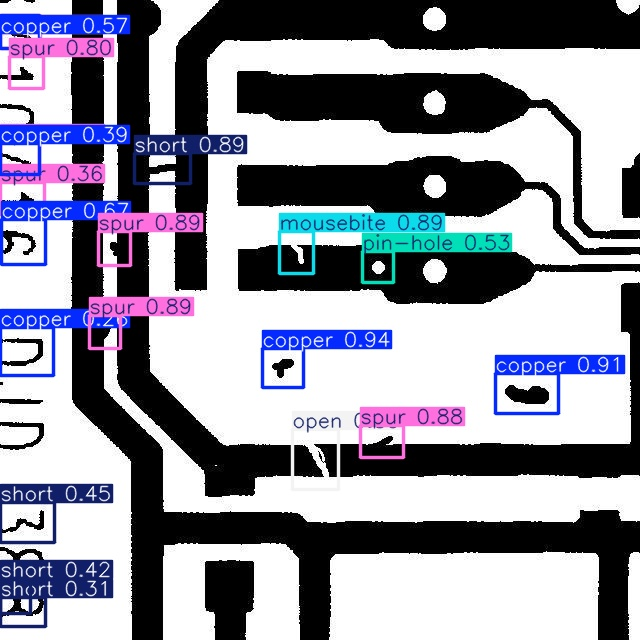


image 1/1 /content/data/DeepPBC/valid/images/00041010_test_jpg.rf.9650adc062cd125e565011a2edd7b6be.jpg: 640x640 6 coppers, 1 mousebite, 1 open, 1 pin-hole, 4 shorts, 6 spurs, 64.8ms
Speed: 3.9ms preprocess, 64.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


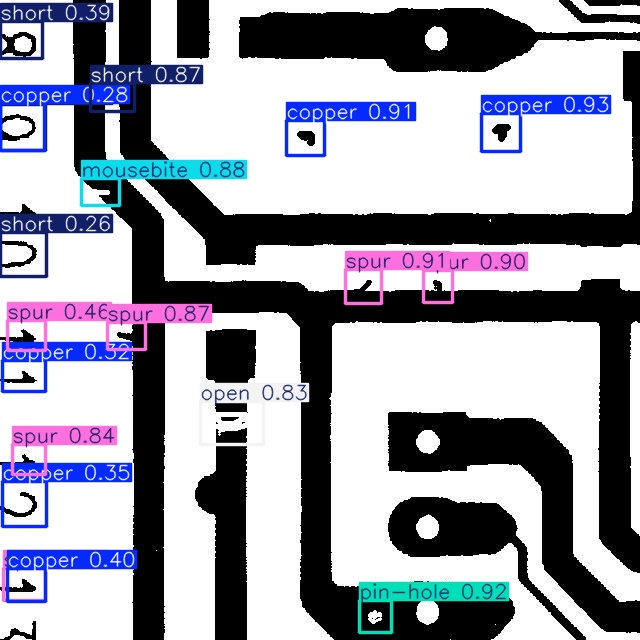


image 1/1 /content/data/DeepPBC/valid/images/00041018_test_jpg.rf.e95b49e8efd5f5f432c2b03d94b2de0b.jpg: 640x640 2 coppers, 1 mousebite, 1 open, 1 pin-hole, 1 short, 1 spur, 61.9ms
Speed: 2.9ms preprocess, 61.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


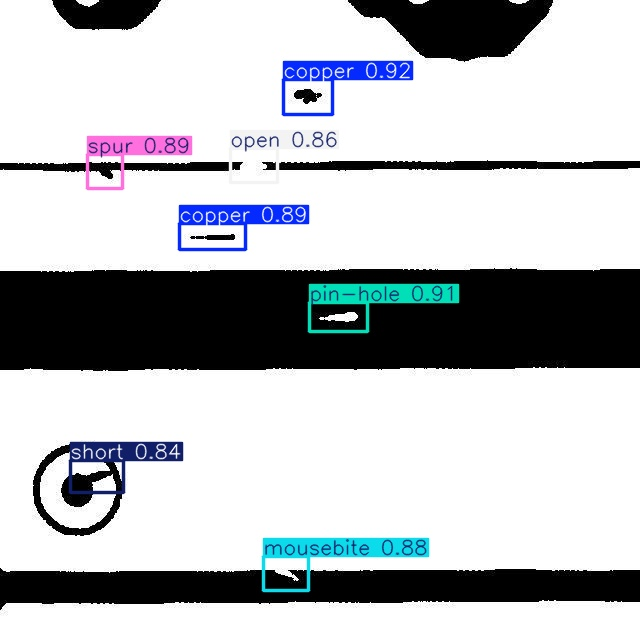


image 1/1 /content/data/DeepPBC/valid/images/00041020_test_jpg.rf.edf728862da8162b30fe6cda3e5488fe.jpg: 640x640 4 mousebites, 1 open, 1 spur, 62.2ms
Speed: 2.1ms preprocess, 62.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


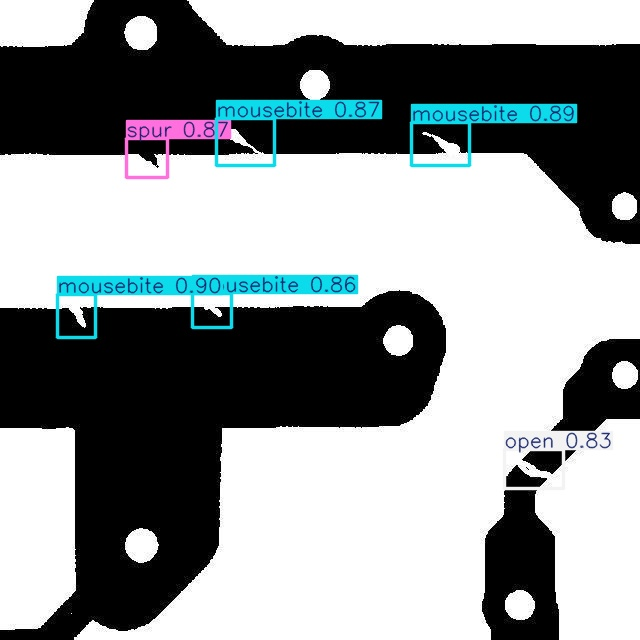


image 1/1 /content/data/DeepPBC/valid/images/00041053_test_jpg.rf.bc7328838feba4a4e12c5976881e0cbd.jpg: 640x640 1 copper, 3 mousebites, 2 opens, 1 pin-hole, 2 shorts, 1 spur, 56.5ms
Speed: 3.0ms preprocess, 56.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


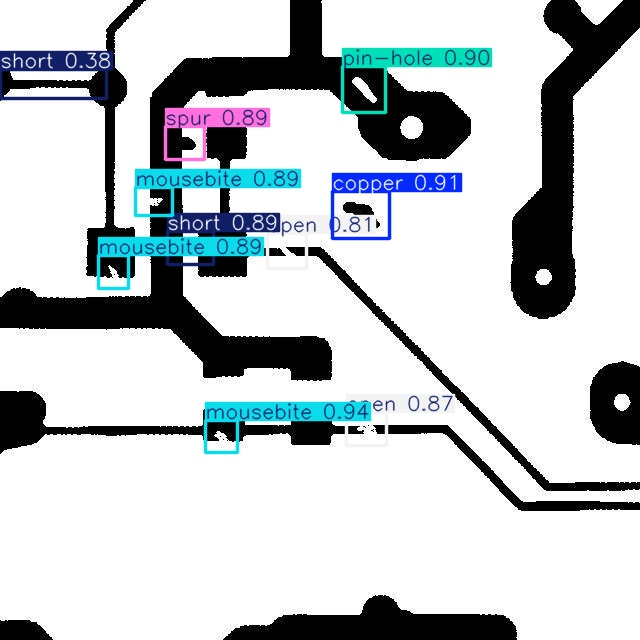

In [11]:
# ZAD2. wypróbujcie dzialanie modelu z kilkoma (5) obrazkami z folderu valid

from IPython.display import Image, display

paths = [
    '/content/data/DeepPBC/valid/images/00041006_test_jpg.rf.612e798d3949ac4f3d8d73c32ee04a09.jpg',
    '/content/data/DeepPBC/valid/images/00041010_test_jpg.rf.9650adc062cd125e565011a2edd7b6be.jpg',
    '/content/data/DeepPBC/valid/images/00041018_test_jpg.rf.e95b49e8efd5f5f432c2b03d94b2de0b.jpg',
    '/content/data/DeepPBC/valid/images/00041020_test_jpg.rf.edf728862da8162b30fe6cda3e5488fe.jpg',
    '/content/data/DeepPBC/valid/images/00041053_test_jpg.rf.bc7328838feba4a4e12c5976881e0cbd.jpg'
]

for p in paths:
    results = model.predict(source=p, save=True)
    display(Image(filename=results[0].save_dir + '/' + p.split('/')[-1]))


In [12]:
# ZAD3. Sprobujcie wyeksportowac model do formatu TensorRT (https://docs.ultralytics.com/modes/export/#export-formats)
# Export the model
model.export(format="engine")

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (130.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 147ms
Prepared 6 packages in 6.94s
Installed 6 packages in 256ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.20.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.82

requirements: AutoUpdate success ✅ 8.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 

'runs/detect/train/weights/best.engine'